# Introduction

Genome sequencing is a powerful technology that has revolutionized our
understanding of genetics and has been instrumental in numerous
scientific breakthroughs. The cost of genome sequencing has been
decreasing rapidly over the years, making it more accessible to
researchers and clinicians alike.

In this notebook, we are conducting a time series analysis and linear
regression analysis on genome sequencing costs.

``` r
# Load the required packages
library("tidyverse")
```

    ## ── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
    ## ✔ dplyr     1.1.2     ✔ readr     2.1.4
    ## ✔ forcats   1.0.0     ✔ stringr   1.5.0
    ## ✔ ggplot2   3.4.2     ✔ tibble    3.2.1
    ## ✔ lubridate 1.9.2     ✔ tidyr     1.3.0
    ## ✔ purrr     1.0.1     
    ## ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
    ## ✖ dplyr::filter() masks stats::filter()
    ## ✖ dplyr::lag()    masks stats::lag()
    ## ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

``` r
library("forecast")
```

    ## Registered S3 method overwritten by 'quantmod':
    ##   method            from
    ##   as.zoo.data.frame zoo

``` r
# Read in the data
genome_s <- read.csv("sequencing-costs.csv")
```

``` r
head(genome_s)
```

    ##         Date Cost.per.Mb Cost.per.Genome
    ## 1 2001-09-15    5292.393        95263072
    ## 2 2002-03-15    3898.635        70175437
    ## 3 2002-09-15    3413.801        61448422
    ## 4 2003-03-15    2986.205        53751684
    ## 5 2003-10-15    2230.975        40157554
    ## 6 2004-01-15    1598.910        28780376

``` r
dim(genome_s)
```

    ## [1] 52  3

``` r
sum(is.na(genome_s$Cost.per.Mb))
```

    ## [1] 0

## Data Prep & EDA

We notice that the date column is in character format, so we convert it
to a date format, create a time series object from the cost per Mb
column, and plot the time series.

``` r
# Convert the date column to a date format
genome_s$Date <- as.Date(genome_s$Date, format = "%Y-%m-%d")

# Create a time series object
ts_genome_s <- ts(genome_s$Cost.per.Mb, start = c(year(genome_s$Date[1]), month(genome_s$Date[1])), frequency = 12)

# Plot the time series
plot(ts_genome_s, main = "Cost per Mb over time", xlab = "Year", ylab = "Cost per Mb")
```

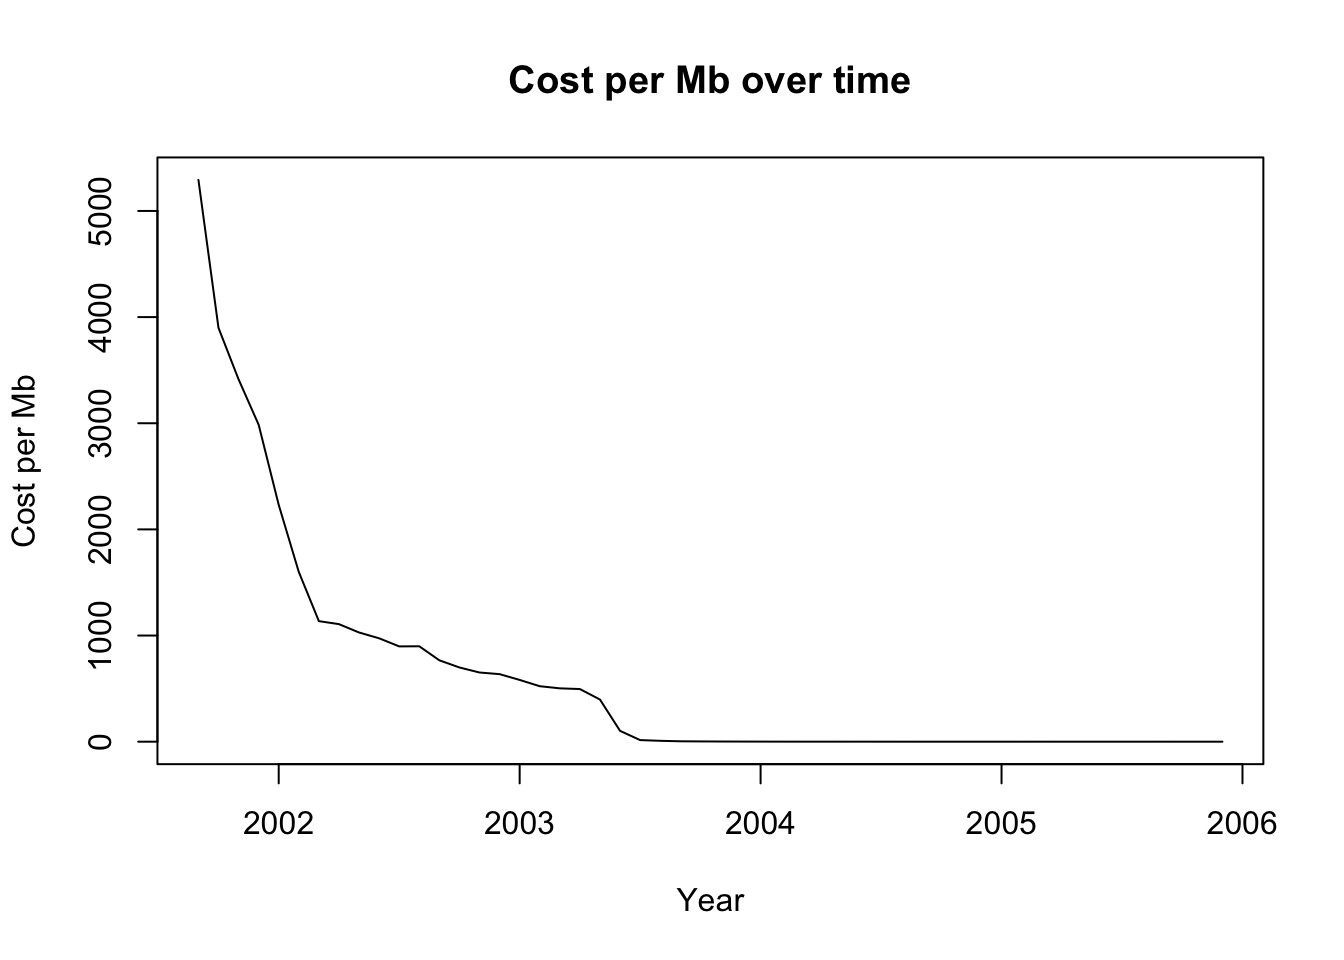
The decline in sequencing costs after 2002 can be attributed to the
advancement in technology, specifically the development of
next-generation sequencing (NGS) technologies. NGS technologies allowed
for faster and more cost-effective sequencing, enabling researchers to
sequence larger amounts of DNA at a faster pace. The decreased cost of
sequencing led to an increase in demand for sequencing services, which
further drove down the cost. Additionally, advancements in computational
power and data storage made it possible to handle and analyze the
massive amounts of data generated by NGS technologies, making sequencing
more accessible and affordable. As a result, the cost of sequencing
continued to decline rapidly in subsequent years.

Next, we decompose the time series into trend, seasonal, and remainder
components and plot the decomposed time series.

``` r
# Decompose the time series into trend, seasonal, and remainder components
decomp <- decompose(ts_genome_s)

# Plot the decomposed time series
plot(decomp)
```

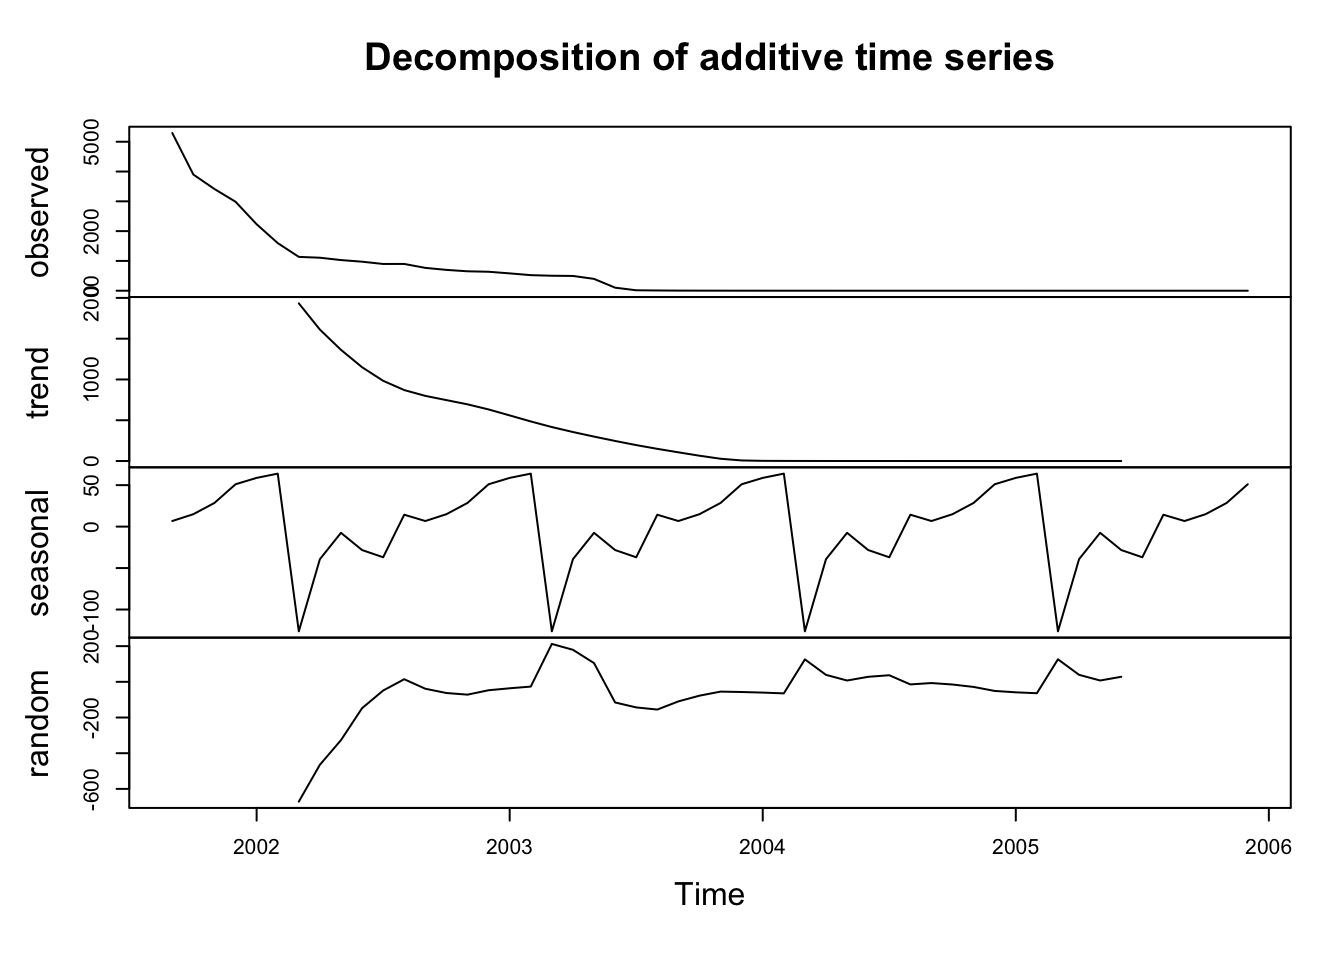

## Correlation & Forecasting

We then create a forecast for the next 12 months and plot it.

Then compute the correlation coefficient between the cost per Mb and the
cost per genome and plot a scatterplot with a trendline. Let’s also
calculate the Spearman or Kendall correlation coefficients. Spearman and
Kendall correlation coefficients are non-parametric measures of
correlation between two variables.

Both Spearman and Kendall correlation coefficients are robust to
outliers and do not assume any particular distribution of the data.
Therefore, they are useful for analyzing the relationship between two
variables when the assumptions of a parametric test, such as Pearson’s
correlation coefficient, are not met.

``` r
# Create a forecast for the next 12 months
forecast_data <- forecast(ts_genome_s, h = 12)

# Plot the forecast
plot(forecast_data, main = "Forecast of Cost per Mb", xlab = "Year", ylab = "Cost per Mb")
```

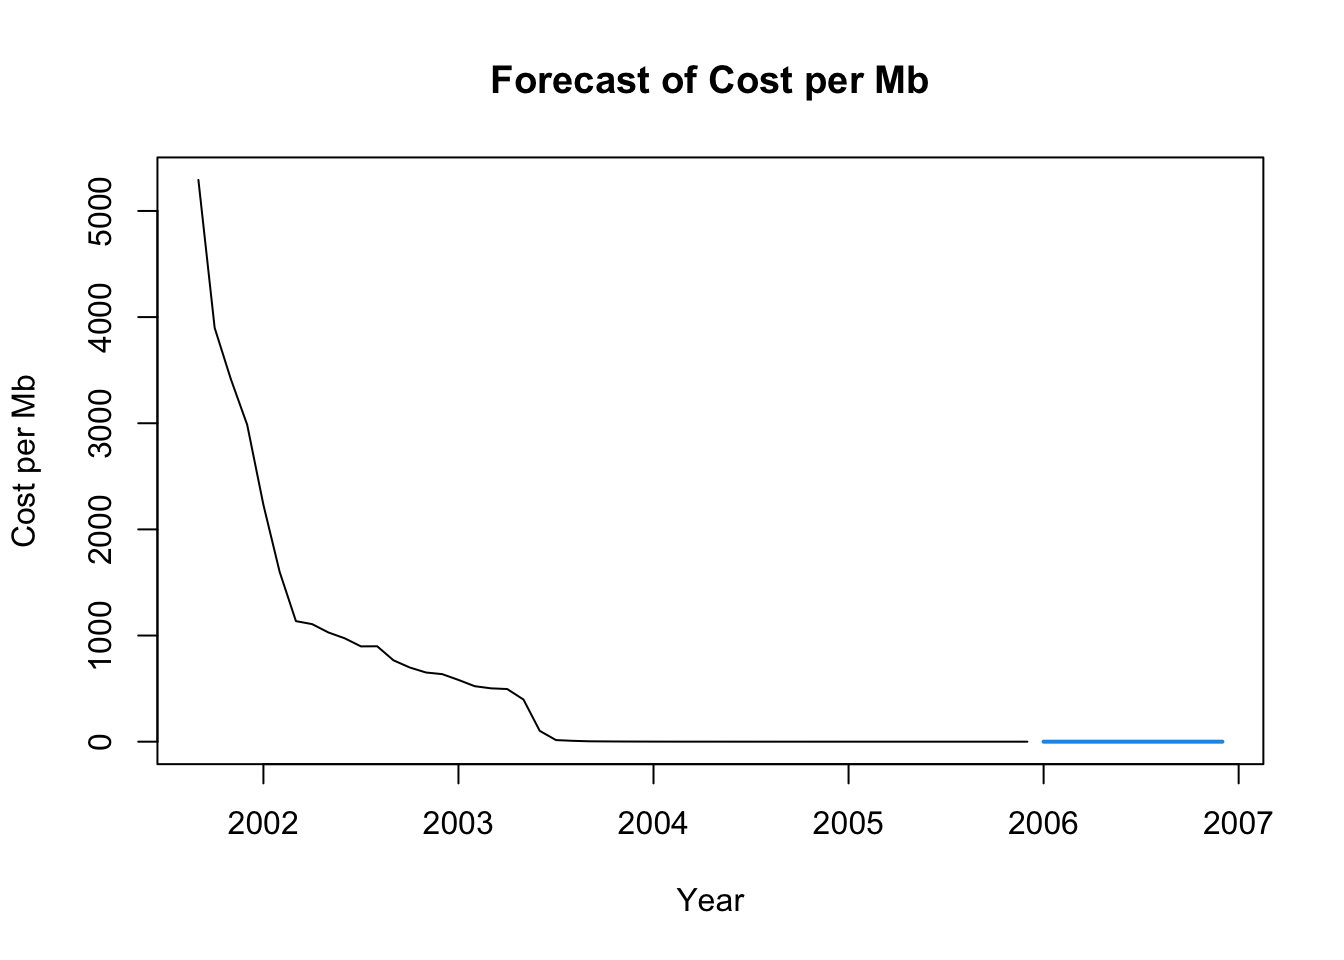

``` r
# Compute the correlation coefficient between the cost per Mb and the cost per genome 
cor(genome_s$Cost.per.Mb, genome_s$Cost.per.Genome)
```

    ## [1] 0.99993

We see that there’s a very high correlation between Cost per Mb and Cost
per Genome

``` r
plot(genome_s$Cost.per.Mb, genome_s$Cost.per.Genome, main = "Scatterplot of Cost per Mb and Cost per Genome", xlab = "Cost per Mb", ylab = "Cost per Genome")

abline(lm(genome_s$Cost.per.Genome ~ genome_s$Cost.per.Mb), col = "#e56d72")
```

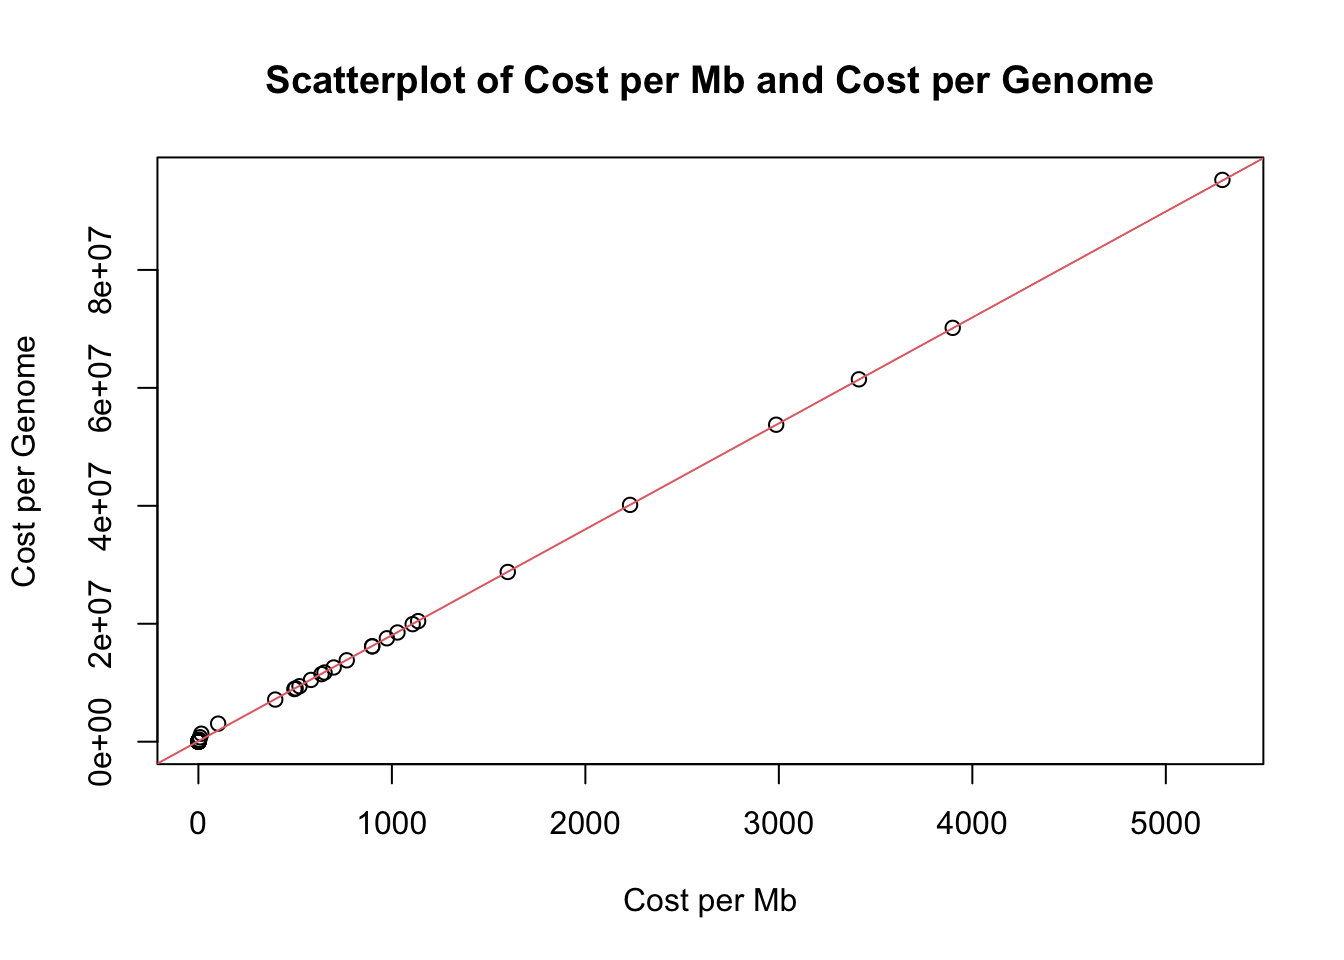

``` r
# Calculate the Spearman or Kendall correlation coefficients
cor.test(genome_s$Cost.per.Mb, genome_s$Cost.per.Genome, method = "spearman")
```

    ## Warning in cor.test.default(genome_s$Cost.per.Mb, genome_s$Cost.per.Genome, :
    ## Cannot compute exact p-value with ties

    ## 
    ##  Spearman's rank correlation rho
    ## 
    ## data:  genome_s$Cost.per.Mb and genome_s$Cost.per.Genome
    ## S = 1, p-value < 2.2e-16
    ## alternative hypothesis: true rho is not equal to 0
    ## sample estimates:
    ##       rho 
    ## 0.9999573

``` r
cor.test(genome_s$Cost.per.Mb, genome_s$Cost.per.Genome, method = "kendall")
```

    ## 
    ##  Kendall's rank correlation tau
    ## 
    ## data:  genome_s$Cost.per.Mb and genome_s$Cost.per.Genome
    ## z = 10.448, p-value < 2.2e-16
    ## alternative hypothesis: true tau is not equal to 0
    ## sample estimates:
    ##       tau 
    ## 0.9992456

## Linear Regression

We then build a linear regression model to predict the cost per genome
based on the cost per Mb. We visualize the model with a scatterplot and
a red line, which represents the regression line.

``` r
# Build a linear regression model to predict Cost per Genome based on Cost per Mb
model_g <- lm(Cost.per.Genome ~ Cost.per.Mb, data = genome_s)
summary(model_g)
```

    ## 
    ## Call:
    ## lm(formula = Cost.per.Genome ~ Cost.per.Mb, data = genome_s)
    ## 
    ## Residuals:
    ##     Min      1Q  Median      3Q     Max 
    ##  -93376  -89303  -71639  -39254 1134568 
    ## 
    ## Coefficients:
    ##             Estimate Std. Error t value Pr(>|t|)    
    ## (Intercept) 94469.52   37435.30   2.524   0.0148 *  
    ## Cost.per.Mb 17965.69      30.06 597.625   <2e-16 ***
    ## ---
    ## Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
    ## 
    ## Residual standard error: 237300 on 50 degrees of freedom
    ## Multiple R-squared:  0.9999, Adjusted R-squared:  0.9999 
    ## F-statistic: 3.572e+05 on 1 and 50 DF,  p-value: < 2.2e-16

his result shows that there is a strong positive relationship between
the cost per genome and the cost per Mb of sequencing. The coefficient
of determination (R-squared) of 0.9999 indicates that the linear model
fits the data extremely well. The intercept of 94469.52 suggests that
there is a fixed cost associated with genome sequencing, while the
coefficient of 17965.69 indicates that the variable cost of sequencing
increases linearly with the cost per Mb. The p-value of less than
2.2e-16 suggests that the relationship between the two variables is
statistically significant, and is unlikely to be due to chance.

After fitting a linear regression model to predict cost per genome based
on cost per Mb, we can use the plot function to generate four diagnostic
plots to check the assumptions of the model.

``` r
plot(model_g)
```

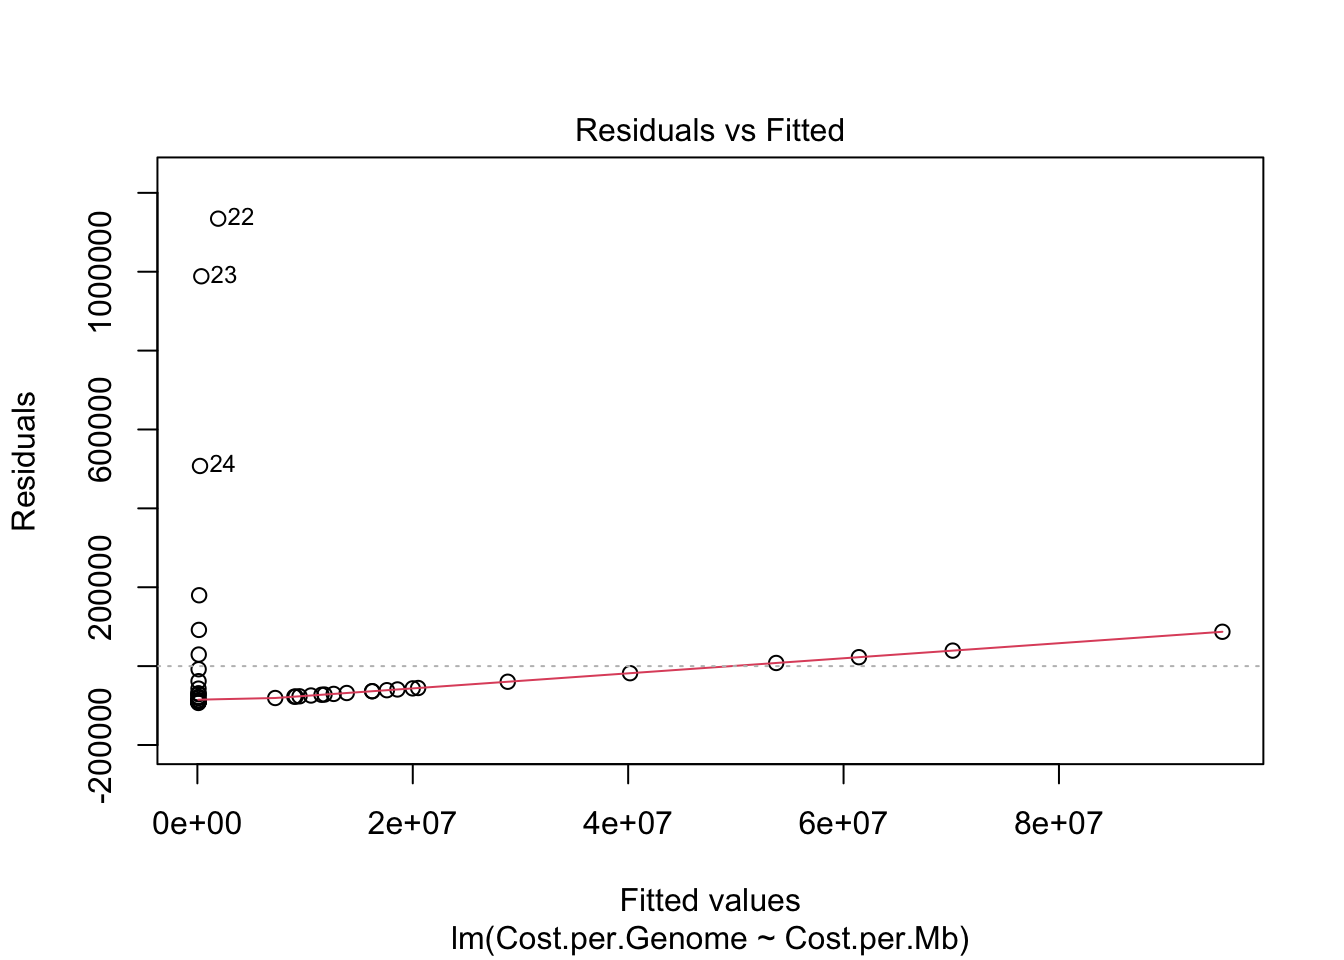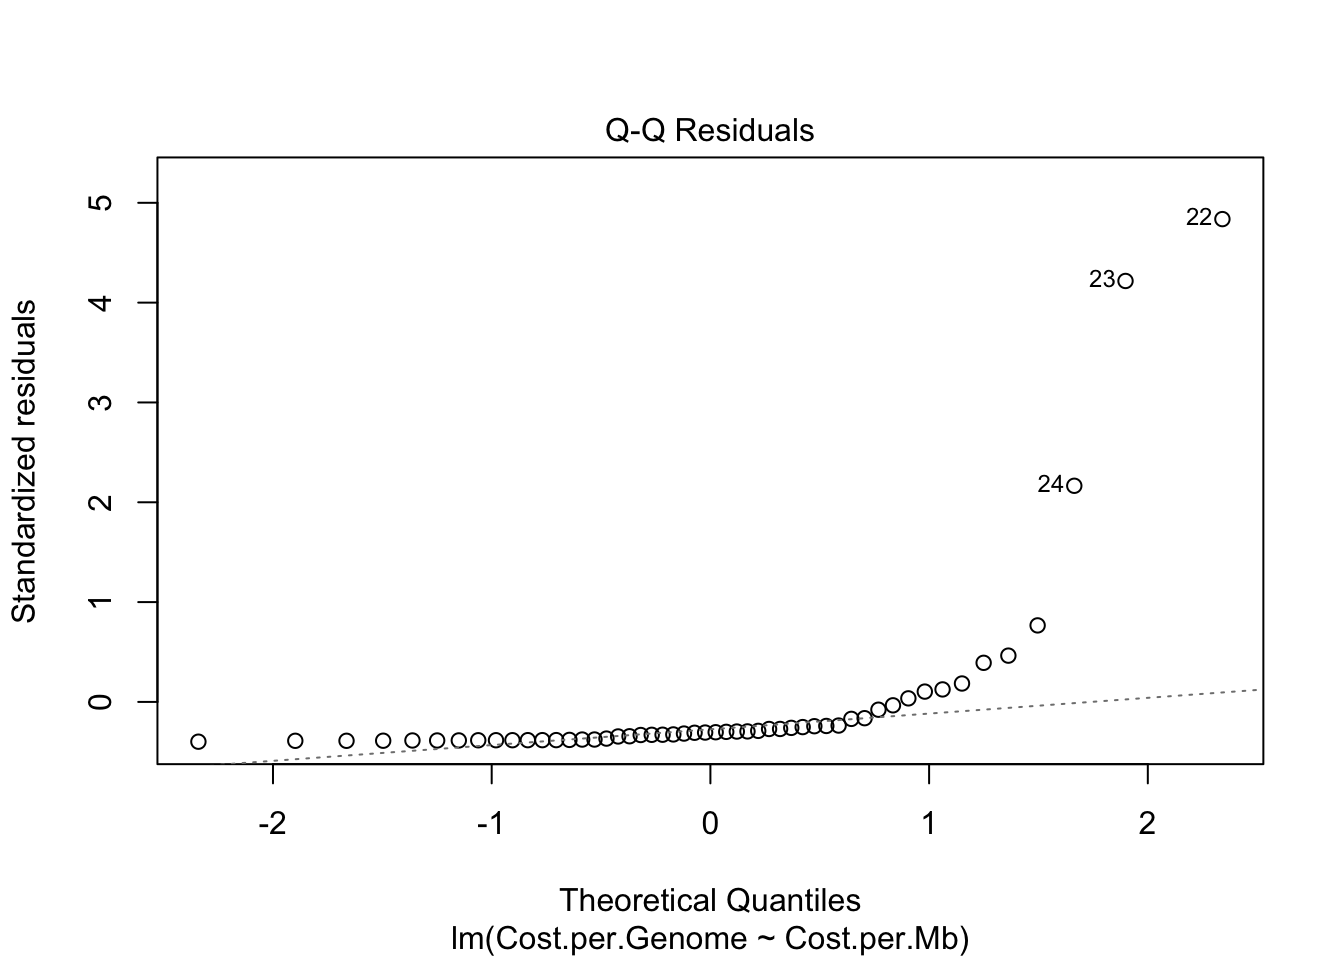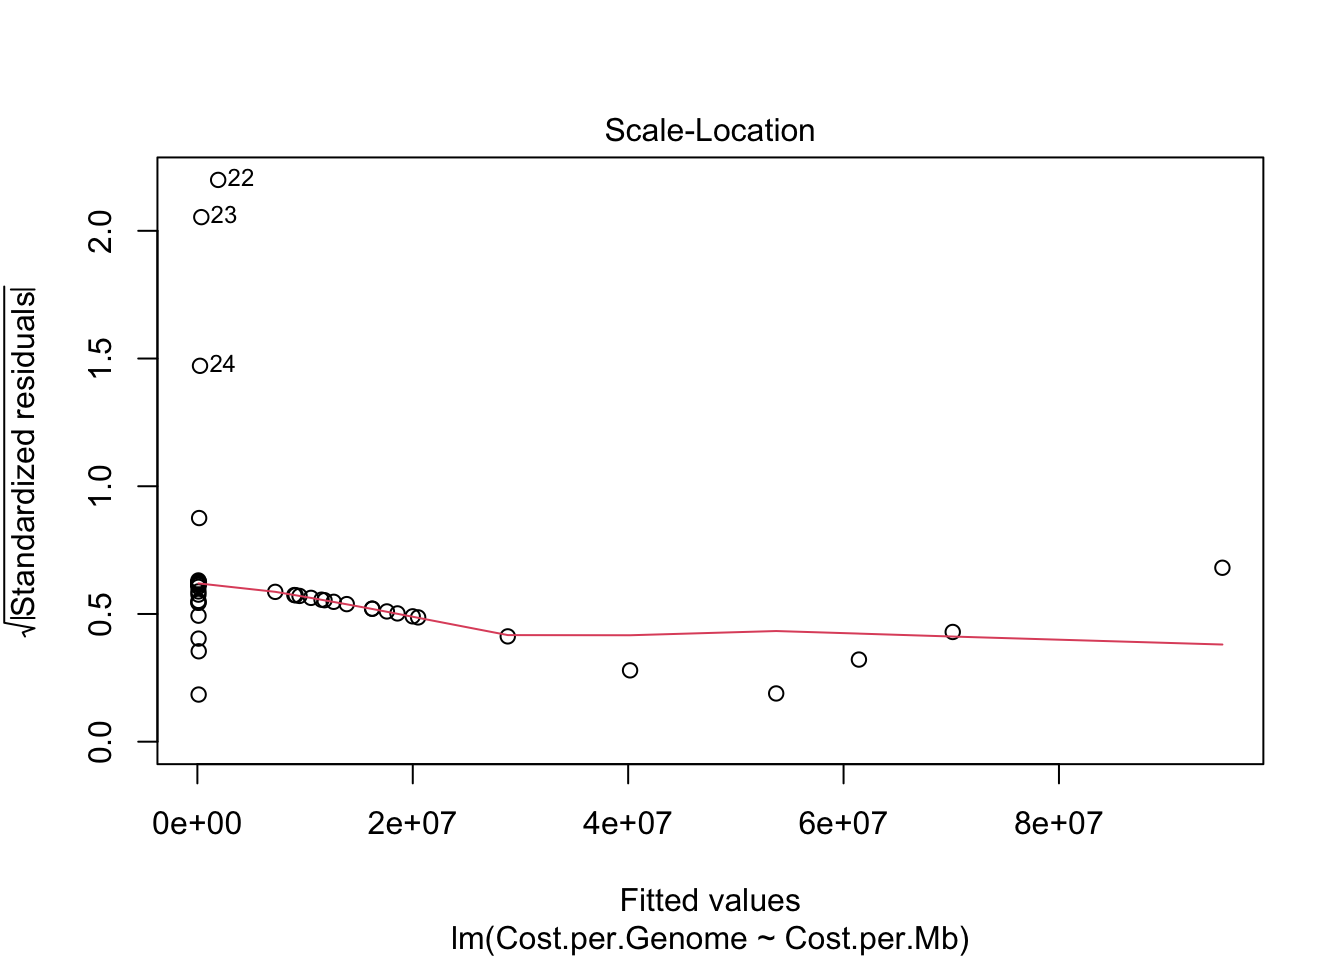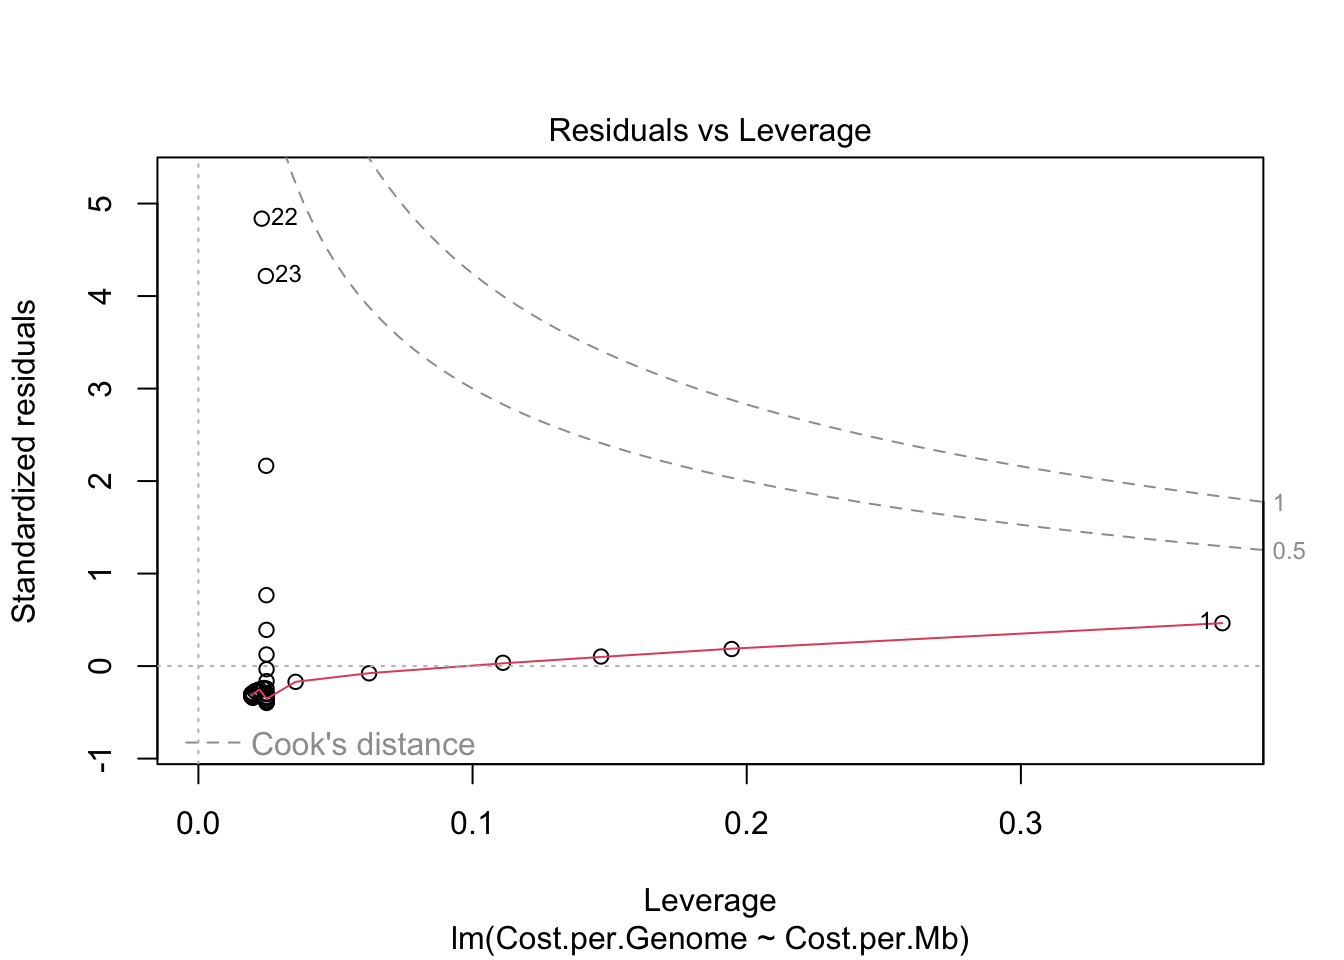

``` r
# Visualize the model
plot(genome_s$Cost.per.Mb, genome_s$Cost.per.Genome, main = "Linear Regression Model", xlab = "Cost per Mb", ylab = "Cost per Genome")
abline(model_g, col = "red")
```

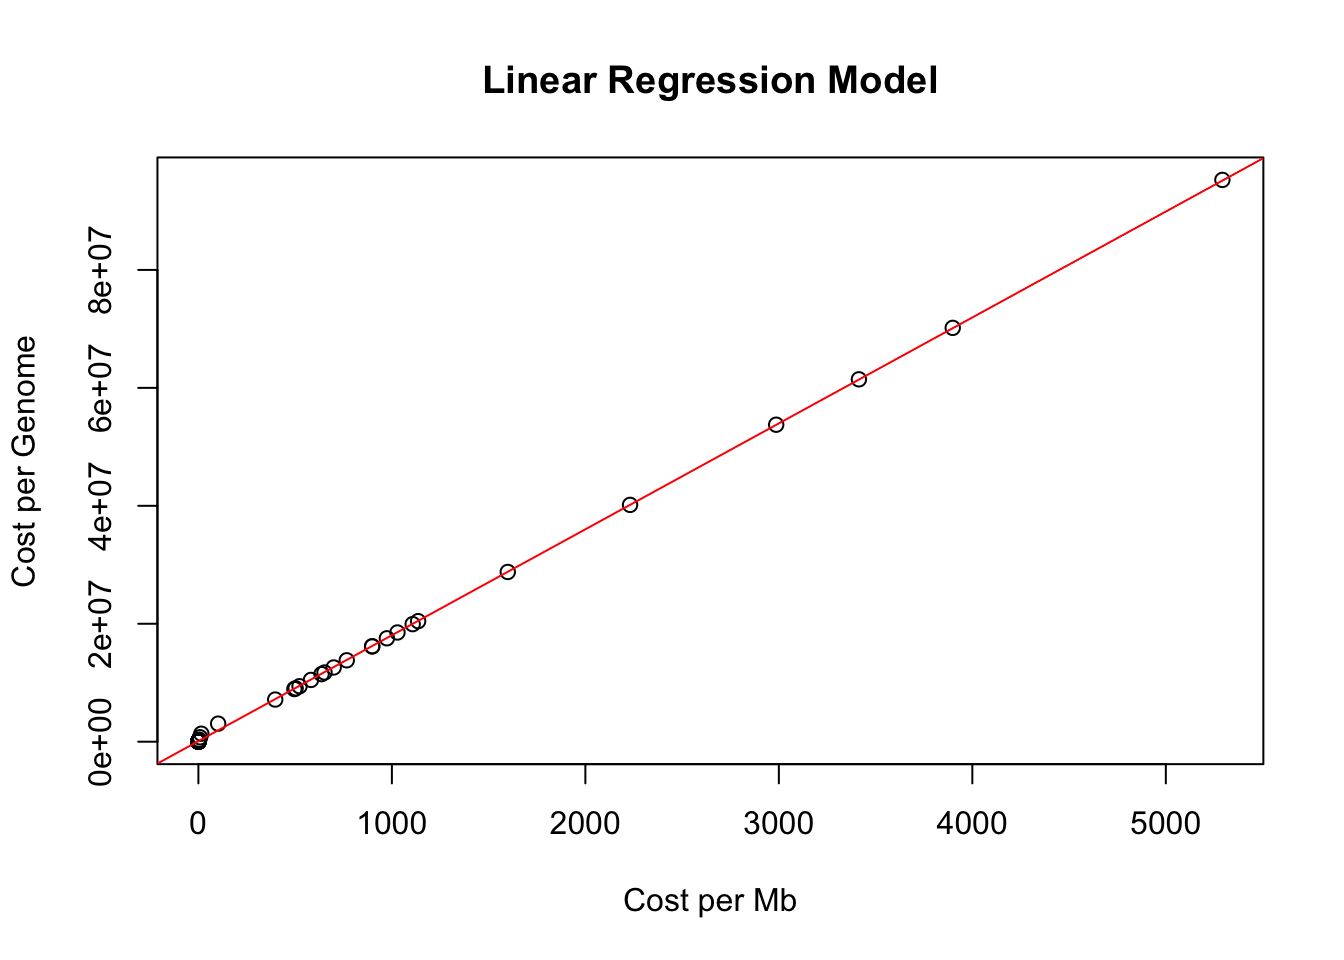

Calculated the predicted values and residuals and evaluate the model’s
performance by calculating the evaluation metrics such as mean squared
error (MSE), root mean squared error (RMSE), and R-squared.

``` r
# Calculate the predicted values and residuals
pred_g <- predict(model_g)
resid_g <- genome_s$Cost.per.Genome - pred_g
```

``` r
# Calculate the evaluation metrics
mse_g <- mean(resid_g^2)
rmse_g <- sqrt(mse_g)
r2_g <- summary(model_g)$r.squared
```

Finally, we plot the actual vs predicted cost per genome and print out
the evaluation metrics.

``` r
plot(genome_s$Cost.per.Mb, genome_s$Cost.per.Genome, col = "blue", main = "Actual vs Predicted Cost per Genome", xlab = "Cost per Mb", ylab = "Cost per Genome")
points(genome_s$Cost.per.Mb, pred_g, col = "red")
abline(model_g, col = "red")
```

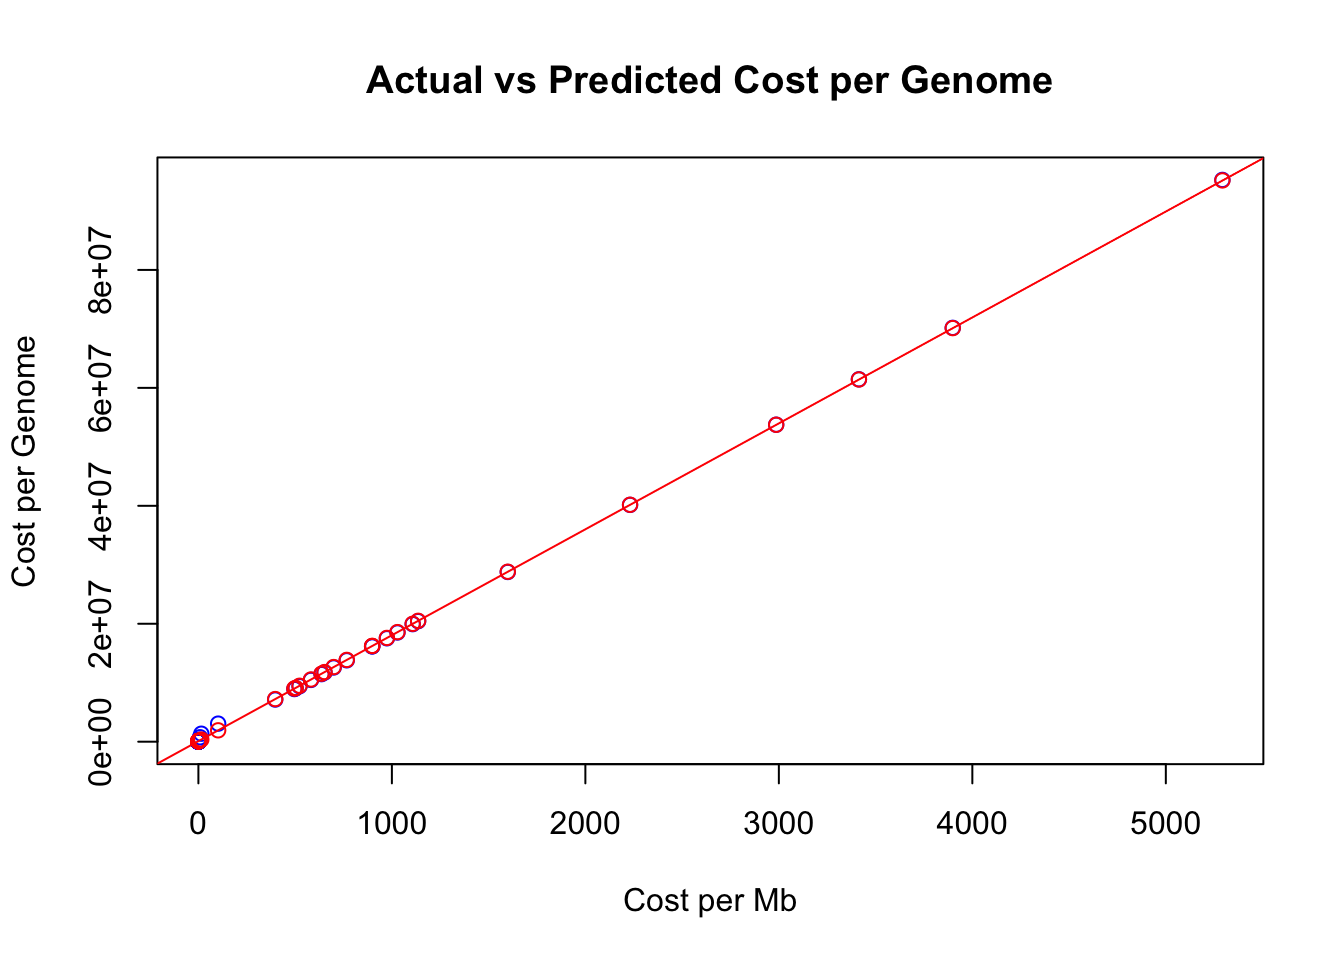